In [2]:
import torch
import torch.nn as nn
import numpy as np
from neural_odes import *
import matplotlib.pyplot as plt
import random
from tqdm import tqdm_notebook as tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
num_time_series = 4
num_time_steps = 60
low_rank_param = 100
is_sym = True
is_full_matrix = True

In [178]:
#random.seed(1521)
#for i in range(,)
num = 0
for i in range(1, 301):
    num_s = 0
    while num_s < 20:
        r, k, p0, A = generate_data(num_time_series)
        k = k + i
        neural_lv = NeuralLV(num_time_series, num_time_steps, low_rank_param, is_full_matrix, p0, r, k, A, is_sym)
        p = neural_lv.solve_discrete_lv(A)
        if torch.max(torch.abs(p)) < 600:
            p = ((p - torch.min(p))/(torch.max(p) - torch.min(p))).float().transpose(0,1)
            #torch.save(p, '/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/LV/sample_' + str(num) + ".pt")
            num_s += 1
            num += 1
    #print(num, num_s)
        
# print(r)
# print(k)
# print(p0)
# print(A)

#random.seed(1521)
#for i in range(,)
num = 0
for i in range(0, 200):
    num_s = 0
    while num_s < 30:
        r, k, p0, A = generate_data(num_time_series)
        k = k + 300
        p0 += i
        neural_lv = NeuralLV(num_time_series, num_time_steps, low_rank_param, is_full_matrix, p0, r, k, A, is_sym)
        p = neural_lv.solve_discrete_lv(A)
        if torch.max(torch.abs(p)) < 600:
            p = ((p - torch.min(p))/(torch.max(p) - torch.min(p))).float().transpose(0,1)
            torch.save(p, '/home/ec2-user/SageMaker/efs/Danielle/Ray/Data/LV_2/sample_' + str(num) + ".pt")
            num_s += 1
            num += 1
    #print(num, num_s)
        
# print(r)
# print(k)
# print(p0)
# print(A)

20 20


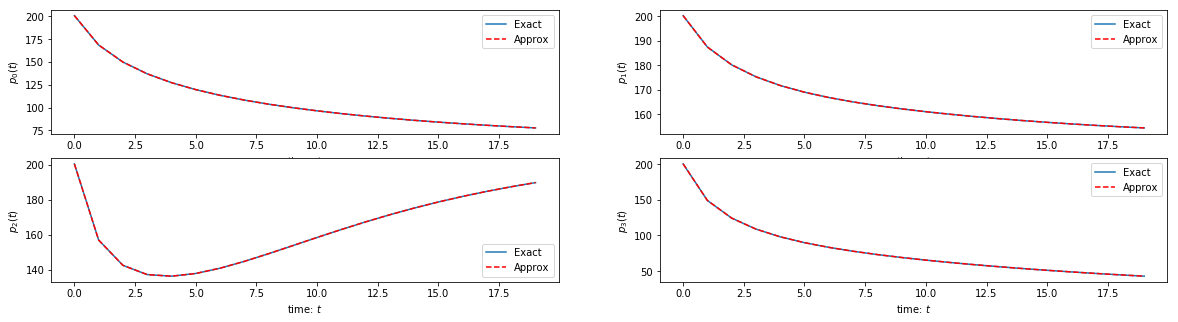

In [37]:
num_time_series = 4
num_time_steps = 20
r, k, p0, A = generate_data(num_time_series)
k = k + 300
p0 += 200

neural_lv = NeuralLV(num_time_series, num_time_steps, low_rank_param, is_full_matrix, p0, r, k, A, is_sym)
p = neural_lv.solve_discrete_lv(A)
lv_plot_ts(p, p, fig_size_width=20)

In [34]:
neural_lv = NeuralLV(num_time_series, num_time_steps, low_rank_param, is_full_matrix, p0, r, k, A, is_sym)

In [75]:
num_epochs = 10
p_approx, p, A_approx, model= neural_lv.run(num_epochs)

In [76]:
print(f'l2 norm of the error = {torch.sqrt(torch.mean((p_approx-p)**2))}')
print(f'max norm of the error = {torch.max(torch.abs(p_approx-p))}')
print(f'l2 matrix norm of the error of A and its low rank approx = {torch.sqrt(torch.mean((A_approx-A)**2))}')

l2 norm of the error = 0.02544935792684555
max norm of the error = 0.0799015611410141
l2 matrix norm of the error of A and its low rank approx = 0.6787763237953186


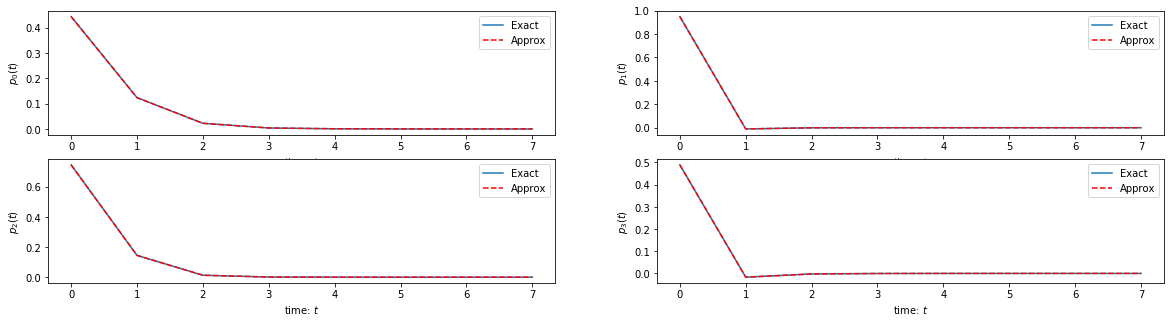

In [80]:
# First ten time series
lv_plot_ts(p, p, fig_size_width=20)